##  ♫♫  Spotify Tracks EDA ♫♫ 
Spotify is a Swedish audio streaming and media services provider founded on 23 April 2006 by Daniel Ek and Martin Lorentzon. It is one of the largest music streaming service providers with over 406 million monthly active users, including 180 million paying subscribers, as of December 2021. The large number of Spotify users allowed to create significant content database and retreive valuable patterns from tracks attributes. 

### Feature Explanations - Dataset contains 586672 tracks and has 20 features as follows-

- 1. id - id of each track

- 2. name - name of the track available on spotify

- 3. popularity - How much popular is the track. The higher the value the more popular the track is

- 4. duration_ms: The duration of the track in milliseconds.

- 5. explicit - Whether the song is explicit or not

- 6. artists - Name osf the artist who sang the track.

- 7. id_artists - associated with the id of the artists

- 8. release_date - The date on whcih track was released

- 9. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- 10. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

- 11. key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation .  

- 12. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- 13. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- 14. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.

- 15. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


- 16. instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- 17. livliness - The higher the value, the more likely the song is a live recording.

- 18. valence- A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

  
- 19. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
 

- 20. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import mplcyberpunk
import math
from cycler import cycler
import matplotlib.pyplot as plt
plt.style.use("cyberpunk")
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['figure.figsize'] = (18,8)
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans' 

In [2]:
# Import Dataset
tracks = pd.read_csv("tracks.csv")
pd.set_option("display.max_columns",None)
tracks.sample(n=3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
184451,6B02MufyAO1pPsWYRespCr,Let It Rain,39,271960,0,['Amanda Marshall'],['2ON3fLFbL1rHfHEjeYNKsO'],1996-02-06,0.507,0.612,4,-6.721,1,0.0302,0.0131,0.000000,0.0518,0.450,147.896,4
159349,7xFjlgB66QC4yh7NFhfYLG,Romance de amor,2,179749,0,"['Vicente Gomez', 'Guillermo Gomez']","['1W1yxHMt2uO66aRvzbaucL', '4wOQ41xxL7kDRK34oQ...",1930-01-01,0.184,0.159,3,-22.917,0,0.0379,0.9790,0.923000,0.1020,0.260,85.454,4
342295,6wv7HCuKIKGewRwjHSHSMk,A Guy Like That,43,231533,0,['The Refreshments'],['31oqOoeYTFXYaENhMINVl8'],2000-05-02,0.625,0.899,0,-3.908,1,0.0399,0.2480,0.000011,0.3500,0.973,150.015,4


In [3]:
# CHeck shape of the data
tracks.shape

(586672, 20)

In [4]:
# Information about the dataset -Column, non null values,counts and dtype
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
#Convert the column 'release_date' to Datetime
tracks['release_date'] = pd.to_datetime(tracks['release_date'])
tracks['year'] = pd.DatetimeIndex(tracks['release_date']).year
tracks['month'] = pd.DatetimeIndex(tracks['release_date']).month

In [6]:
# Duration of tracks in minutes
tracks['duration_min'] = tracks['duration_ms'] / 60000
tracks['duration_min']

0         2.115050
1         1.636667
2         3.027333
3         2.948450
4         2.718000
            ...   
586667    4.304450
586668    2.554883
586669    3.126683
586670    2.366717
586671    3.572667
Name: duration_min, Length: 586672, dtype: float64

In [7]:
# Average duration of tracks
tracks['duration_min'].mode()

0    4.0
dtype: float64

 - The avergae duration of tracks is about 4 mins

In [8]:
tracks.shape

(586672, 23)

In [9]:
# Check which songs are longer in duration
tracks[tracks.duration_min > 80] 

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month,duration_min
83501,28ci4OQnXnVyOJJjqNTza1,6 Years of 1980 Recordings - Part 2 - 2010-201...,0,4800118,0,['Dan McKie'],['5x6OZlUVGFX4F1QHJCgysn'],2013-01-28,0.751,0.807000,7,-7.129,1,0.0510,0.00257,0.51900,0.102,0.190,127.006,4,2013,1,80.001967
131876,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits - Full DJ Party...,0,5042185,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],2014-12-19,0.457,0.891000,11,-4.596,0,0.0627,0.00467,0.00109,0.294,0.731,129.516,4,2014,12,84.036417
326329,3EEv9UCeZdn4MVFv8tsO1E,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,3,5621218,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],1979-07-28,0.638,0.537000,8,-13.365,1,0.7750,0.82500,0.00000,0.345,0.401,131.446,3,1979,7,93.686967
399471,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018 - Continuous Mix 2,0,4864333,0,['Monoteque'],['1w3ov1Em1iYnTpAh3pIbOf'],2018-12-16,0.691,0.639000,1,-10.181,1,0.0486,0.00424,0.72100,0.116,0.157,124.545,4,2018,12,81.072217
450241,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,5403500,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],2013-06-05,0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.39200,0.137,0.000,0.000,0,2013,6,90.058333
586457,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,4995083,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],2010-01-01,0.426,0.249000,11,-7.202,1,0.0301,0.91000,0.00000,0.143,0.400,134.168,3,2010,1,83.251383


- There are total 6 tracks which are more than 80 minutes long in duration.These may lie in outlier category, so we will discard these in further analysis

In [10]:
# Keep only those tracks which are less than 80 mins
tracks = tracks[tracks.duration_min < 80] 

In [11]:
tracks.shape

(586666, 23)

In [12]:
# check for null values
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
year                 0
month                0
duration_min         0
dtype: int64

- There are 71 missing values in the Name Column

In [13]:
# Display the Name columns with NAN values
tracks[tracks.name.isnull()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month,duration_min
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1,1994,1,4.416217
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4,1922,4,3.071550
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1,1922,4,3.193117
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3,1922,4,3.192883
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4,1922,4,2.793367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4,1962,2,3.496000
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4,1962,2,4.288000
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4,1974,12,3.234683
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4,1998,1,4.824000


In [14]:
# Fill the NAN values of Name column with 'Unknown'
tracks['name'] = tracks[['name']].fillna('unknown')

In [15]:
tracks.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
year                0
month               0
duration_min        0
dtype: int64

In [16]:
tracks['year'].unique()

array([1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1968, 2008, 2020, 2018, 1997, 2006, 1991, 2012, 2015, 2011,
       1992, 2007, 1996, 2021, 2013, 2014, 2017, 1967, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1993, 1994, 1995,
       1998, 1999, 2000, 2019, 2016, 2010, 2009, 2004, 2003, 2005, 2001,
       2002, 1900], dtype=int64)

In [17]:
tracks['year'].sort_values(ascending=True)

478627    1900
132350    1922
132349    1922
132348    1922
132347    1922
          ... 
211946    2021
211945    2021
211944    2021
211955    2021
444567    2021
Name: year, Length: 586666, dtype: int64

In [18]:
tracks[tracks['year'] == 1900]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month,duration_min
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],['1BnQrx8p0bHBpidjIGq26z'],1900-01-01,0.659,0.791,2,-4.895,1,0.0295,0.139,0.000002,0.161,0.956,141.999,4,1900,1,3.898667


There is only one song from the year 1900 and rest of the songs are from 1922 onwards. So we will not include this row.

In [19]:
# Keep tracks released after the year 1920 onwards
tracks = tracks[tracks['year'] != 1900]

In [20]:
tracks.shape

(586665, 23)

In [21]:
tracks.duplicated().any().sum()

0

### Exploratory Data Analysis and Visualization

In [22]:
tracks["artists"].head(3)

0                ['Uli']
1    ['Fernando Pessoa']
2    ['Ignacio Corsini']
Name: artists, dtype: object

In [23]:
#Remove the Square Brackets from the artists

tracks["artists"]=tracks["artists"].str.replace("[", "")
tracks["artists"]=tracks["artists"].str.replace("]", "")
tracks["artists"]=tracks["artists"].str.replace("'", "")

tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month,duration_min
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,2,2.115050
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,6,1.636667
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,3,3.027333


In [24]:
old=tracks[tracks['year'] <= 2010]
new=tracks[tracks['year'] > 2010]
print("Total no.of old tracks : ",len(old))
print("Total no.of new tracks : ",len(new))

Total no.of old tracks :  470803
Total no.of new tracks :  115862


In [25]:
print('Tempo of old songs: ')
print('High Tempo: '+str((len(old[old['tempo'] > 137.046])*100)/len(old))[:5]+ '%')
print('Low Tempo: '+str((len(old[old['tempo'] <= 137.046])*100)/len(old))[:5]+ '%')

Tempo of old songs: 
High Tempo: 23.54%
Low Tempo: 76.45%


In [26]:
print('Tempo of new songs: ')
print('High Tempo: '+str((len(new[new['tempo'] > 137.046])*100)/len(new))[:5]+ '%')
print('Low Tempo: '+str((len(new[new['tempo'] <= 137.046])*100)/len(new))[:5]+ '%')

Tempo of new songs: 
High Tempo: 27.70%
Low Tempo: 72.29%


- In new tracks, the percentage of tempo has been increased from 23.54 to 27.70 %

In [27]:
tracks_pop = tracks.groupby(['year'])['popularity'].mean()
tracks_duration = tracks.groupby(['year'])['duration_ms'].mean() 

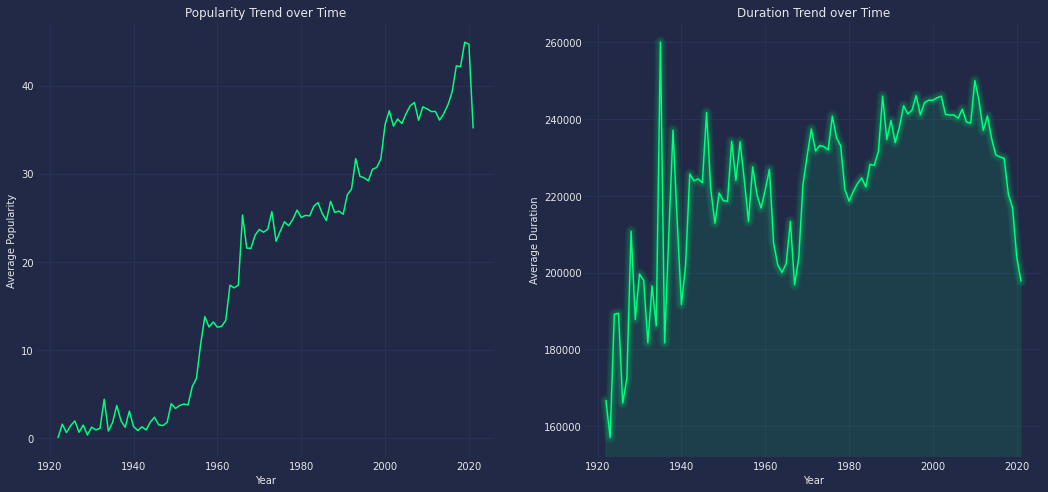

In [28]:
fig, (ax1, ax2) =  plt.subplots(1,2)
ax1 = sns.lineplot(data = tracks_pop, ax=ax1,color='springgreen')
ax2 = sns.lineplot(data = tracks_duration, ax=ax2,color='springgreen')
ax1.set(xlabel='Year', 
        ylabel="Average Popularity", 
        title='Popularity Trend over Time')
ax2.set(xlabel='Year', 
        ylabel="Average Duration", 
        title='Duration Trend over Time')
 
mplcyberpunk.add_glow_effects()
 
plt.show()

We see increasing trend over the years and sudden growth in popularity in late 1950s to early 1970s.

There is sudden drop in popularity in the year 2020 and early 2021.Pandemic might be the reason behind this.

Duration of tracks increased suddenly between 1930 and 1940.

Since 2015, Duration of Tracks has taken a fall.

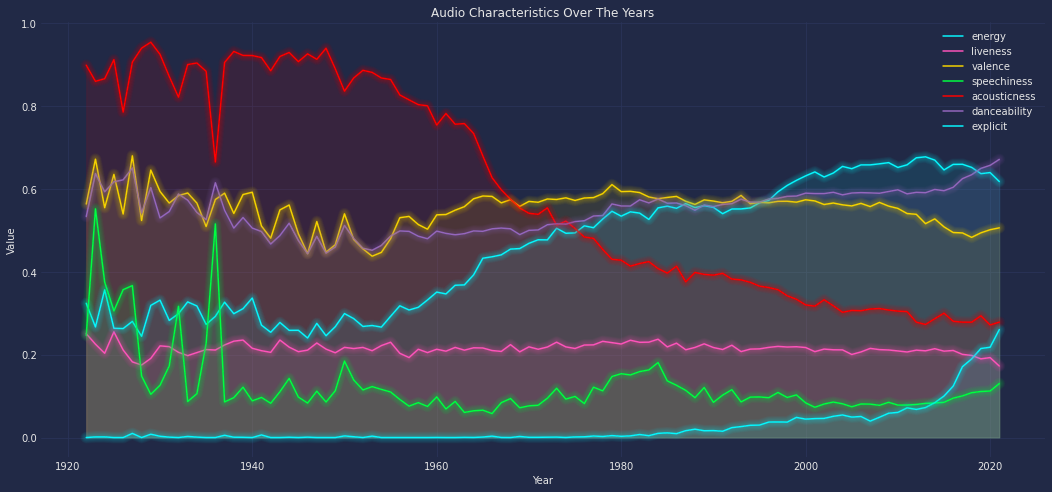

In [29]:
#Tracks Characteristics Over The Years.
 
track_char = tracks.groupby('year').mean()
chars = ["energy","liveness","valence","speechiness","acousticness","danceability","explicit"]
for char in chars:
    var = track_char[char]
    char_trend = sns.lineplot(x=var.index, y=var)
char_trend.legend(chars, loc="upper right")
char_trend.set(xlabel = 'Year', ylabel='Value', title = 'Audio Characteristics Over The Years')
mplcyberpunk.add_glow_effects()
plt.show()

- 'Acousticness' of Tracks has declined over the years while 'Energy' of the Tracks has significantly increased over the Years.

- After 1962, Valence has become quite stable.

- In the initial years i.e. from 1920, speeciness of tracks was higher, however it kept decreasing 1937 and stayed below 0.2

- Danceability has varied significantly but has stayed mostly increased since 1980.

- 'Explicit' Tracks can be seen increasing after late 1980s and have significantly increased since then.

In [30]:
tracks = tracks.drop('duration_min',axis=1)
tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year', 'month'],
      dtype='object')

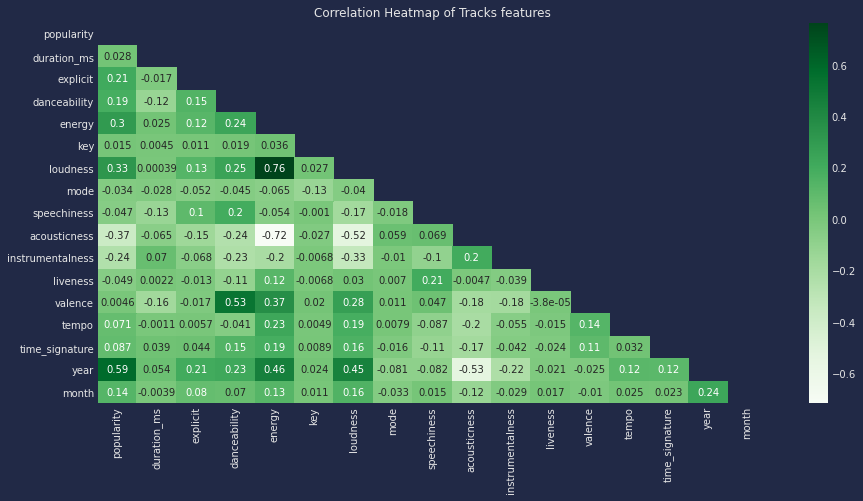

In [31]:
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(tracks.corr(), dtype=bool))
ax = sns.heatmap(tracks.corr(), annot=True, mask=mask,cmap='Greens')
ax.set(title = "Correlation Heatmap of Tracks features")
mplcyberpunk.add_glow_effects(ax)
plt.show()

- Energetic tracks have high positive correlation with Loudness (0.76)
 
- Valence and danceability has positive correlation(0.53)

- Acousticness and Energy have highly negative correlation(-0.72)
 
- Popularity is positively correlated with the year. (0.59)

- Acoustiness is negatively correlated with popularity,duration,explicit,danceability,energy,key and loudness.
  Most popular songs today have either electronic or electric instruments in them.

### Q - In which year most of the songs were released?

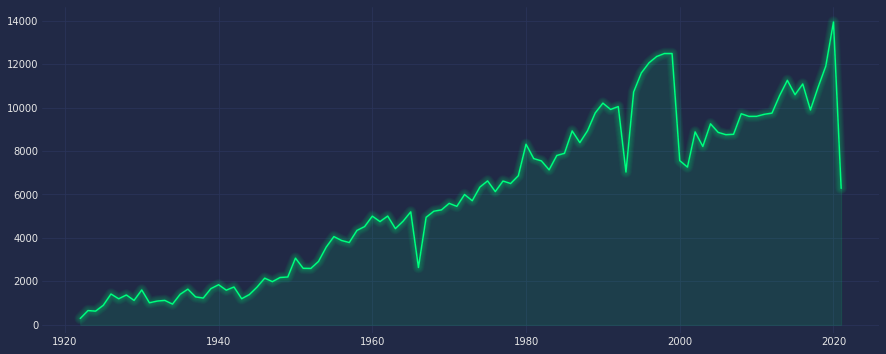

In [32]:
plt.figure(figsize=(15,6))
tracks['year'].value_counts().sort_index().plot(color='springgreen')
mplcyberpunk.add_glow_effects()
plt.show()

- In 2020 most of the tracks got released.

In [33]:
popular_artists = tracks[['name', 'artists','popularity', 'loudness']].sort_values(by=['name'],ascending=False)
popular_artists.head(5)

,name,artists,popularity,loudness
271737,화려하지 않은 고백 Confession Is Not Flashy,LEE SEUNG HWAN,36,-9.539
278277,헤픈엔딩 Happen Ending,"Epik High, Joe Won Sun",48,-5.780
276606,"헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, C...","Leessang, Jung In",51,-2.505
336770,행복했던 날들이었다 days gone by,DAY6,57,-3.712
278325,행복 (Happiness),Red Velvet,57,-3.099


### Which were the Most Energetic and Loud Tracks?

In [34]:
energetic_and_loud = tracks[['name', 'artists','energy', 'loudness']].sort_values(by=['energy','loudness'],ascending=[False,False])
energetic_and_loud.head(5)

,name,artists,energy,loudness
85263,Victim,Komprex,1.0,0.899
188631,Offender,Dimension,1.0,-0.024
499713,Hubschraubereinsatz,DJ Düse,1.0,-1.186
381438,Oct Launcher 8,RedOgre,1.0,-1.605
500552,Aua im Kopf (Morgen sind wir schlauer...),Tobee,1.0,-1.820


In [35]:
# Generate our categorical variable lists
tracks_cat = tracks.dtypes[tracks.dtypes == "object"].index.tolist()
tracks_cat

['id', 'name', 'artists', 'id_artists']

In [36]:
# Count the number of unique artists
artists = np.unique(tracks["artists"])
print("Artists: ", artists)
print("No of unique artists in the list are:", len(artists))

Artists:  ['' '"100 First Songs Participants"' '"23O"' ... '지선' '지수' '최진희']
No of unique artists in the list are: 114013


In [37]:
# Check the value count of artists
artists_count = tracks['artists'].value_counts()
artists_count.head(10)

Die drei ???                          3856
TKKG Retro-Archiv                     2006
Benjamin Blümchen                     1503
Bibi Blocksberg                       1472
Lata Mangeshkar                       1373
Bibi und Tina                          927
Tintin, Tomas Bolme, Bert-Åke Varg     905
Francisco Canaro                       891
Ella Fitzgerald                        870
Tadeusz Dolega Mostowicz               838
Name: artists, dtype: int64

### Top 20 popular artists on Spotify

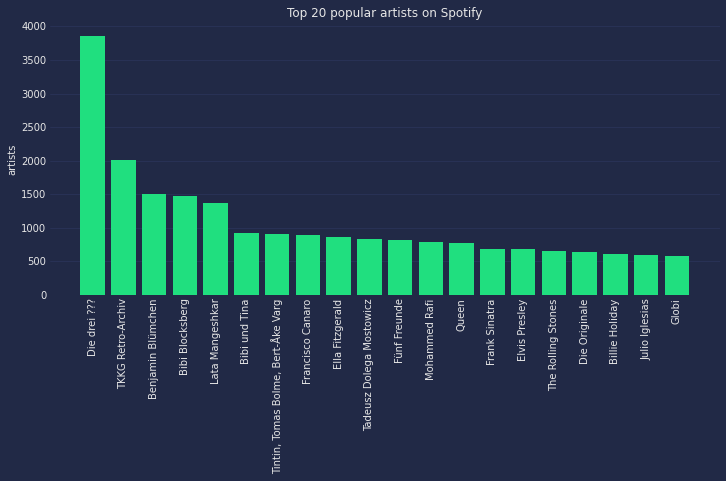

In [38]:
popular_artists = tracks[['name', 'artists','popularity']].sort_values(by=['popularity'],ascending=False)
top_20_artists = popular_artists['artists'].value_counts().nlargest(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_20_artists.index,y=top_20_artists,color='springgreen')
plt.title("Top 20 popular artists on Spotify")
plt.xticks(rotation=90)
mplcyberpunk.add_glow_effects()
plt.show()

- Lata Mangeshkar is the 5th most popular artists :)

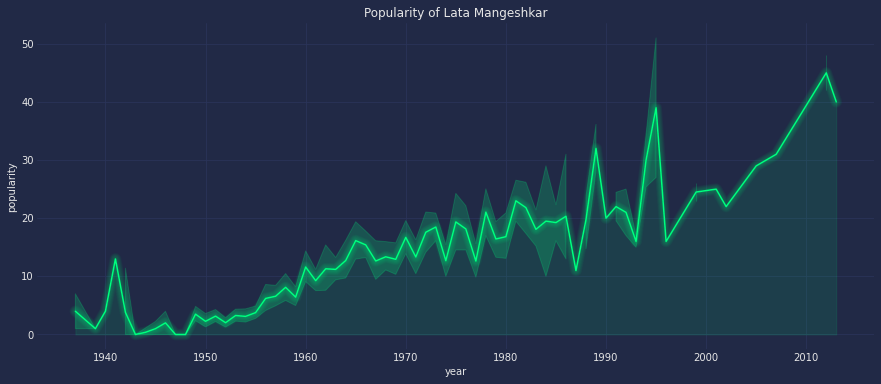

In [39]:
# visualize the popularity of Lata Mangeshkar songs over the year
Lata_M = tracks[tracks['artists'] == 'Lata Mangeshkar']
plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='popularity', data=Lata_M,color='springgreen')
# Labels
plt.title("Popularity of Lata Mangeshkar")
plt.xlabel('year')
plt.ylabel('popularity')
mplcyberpunk.add_glow_effects()
plt.show()

- The popularity of Lata Mageshkar has been increased over all these decades and started dropping after 2010.
 Many new artists came in the industry after 2010. This might be the reason behind the trend.

In [40]:
### Artist with Maximun no. of tracks
Artists_with_most_tracks=pd.DataFrame(tracks['artists'].value_counts().head()).reset_index()
Artists_with_most_tracks.columns=['Artists','Tracks_Count']
Artists_with_most_tracks

,Artists,Tracks_Count
0,Die drei ???,3856
1,TKKG Retro-Archiv,2006
2,Benjamin Blümchen,1503
3,Bibi Blocksberg,1472
4,Lata Mangeshkar,1373


- Die drei has the highest no. of tracks - 3856

### Key Vs Popularity

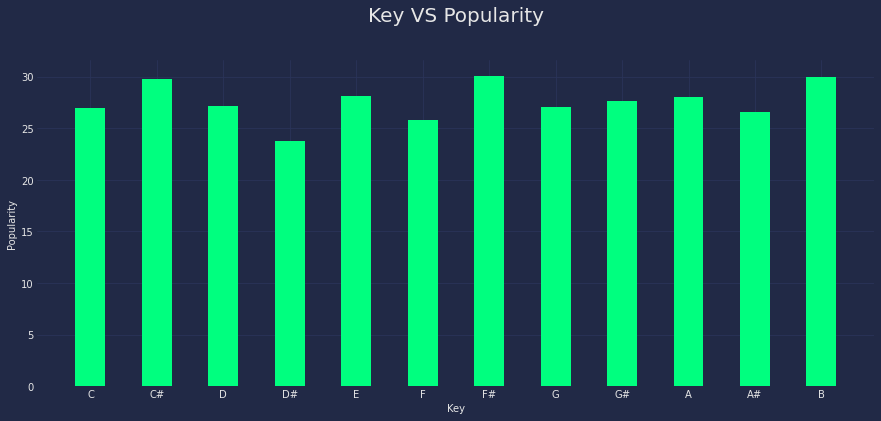

In [41]:
popular_key = pd.DataFrame(tracks.groupby('key')['popularity'].mean()).reset_index()
popular_key.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(15,6))
plt.bar( popular_key['key'],
         popular_key['popularity'],
         width=0.45,color='springgreen')
plt.title('Key VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
ax.axes.get_xaxis().set_visible(True)

mplcyberpunk.add_glow_effects()
plt.show()

In [42]:
tracks['key'].value_counts(ascending=True)

3     21535
6     30856
8     33459
10    37710
11    39130
1     41735
4     48220
5     53614
9     65128
2     66550
7     73778
0     74950
Name: key, dtype: int64

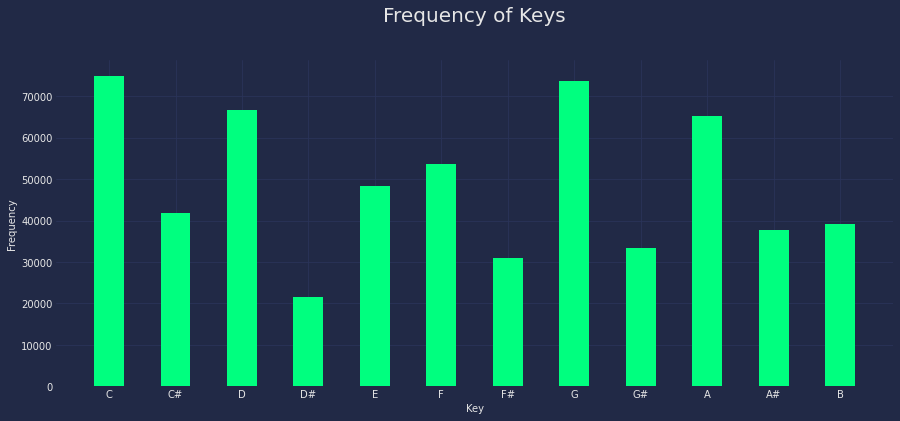

In [43]:
key = pd.DataFrame(tracks['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color= 'springgreen')
plt.title('Frequency of Keys',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
ax.axes.get_xaxis().set_visible(True)

mplcyberpunk.add_glow_effects()
plt.show()

- Majority tracks were made in the C,G and D keys.

### Bottom 10 Artists who are least popular

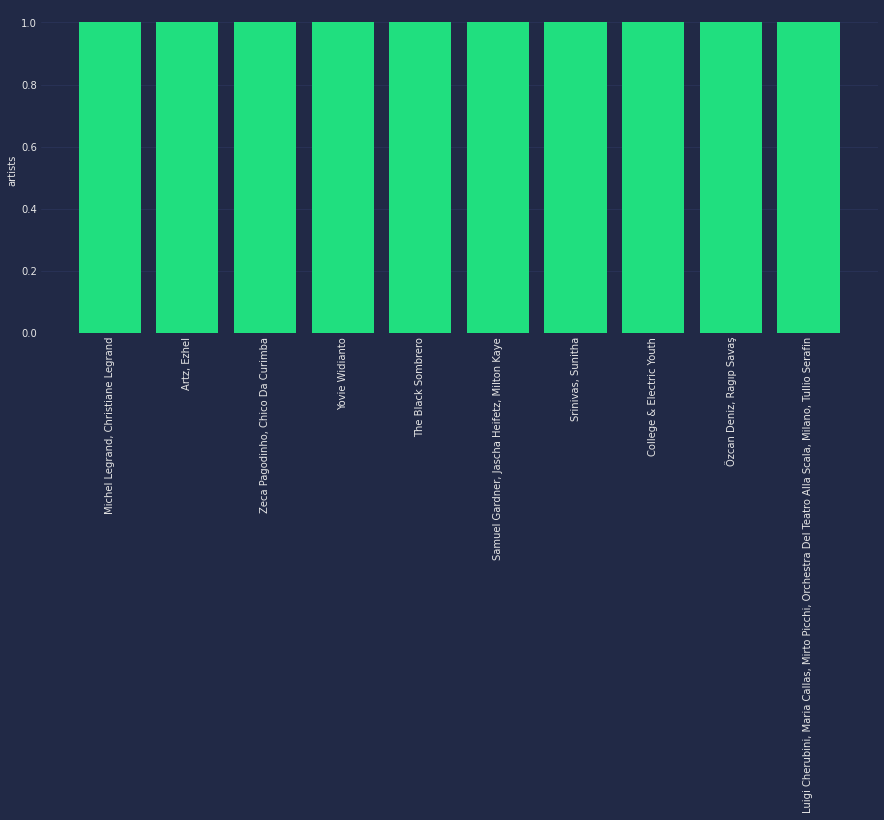

In [44]:
popular_artists = tracks[['name', 'artists','popularity']].sort_values(by=['popularity'],ascending=False)
bottom_10_artists = popular_artists['artists'].value_counts().nsmallest(10)
plt.figure(figsize=(15,6))
sns.barplot(x=bottom_10_artists.index,y=bottom_10_artists,color='springgreen')
plt.xticks(rotation=90)
mplcyberpunk.add_glow_effects()
plt.show()

### Top 10 tracks on Spotify

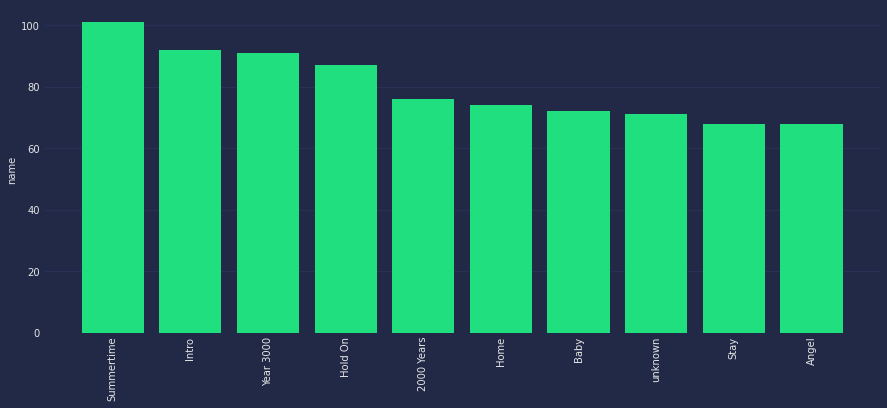

In [45]:
popular_artists = tracks[['name', 'artists','popularity']].sort_values(by=['popularity'],ascending=False)
top_10_tracks = popular_artists['name'].value_counts()[:10]
plt.figure(figsize=(15,6))
sns.barplot(x=top_10_tracks.index,y=top_10_tracks,color='springgreen')
plt.xticks(rotation=90)
mplcyberpunk.add_glow_effects()
plt.show()

-Summertime is the most popular track, followed by intro, Year 3000 and so on......

### Which songs are more popular - Happy or Sad?
Valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

If the threshold of Happy Songs is > 0.5

Happy_Tracks    339666
Sad_Tracks      246999
Name: valence, dtype: int64


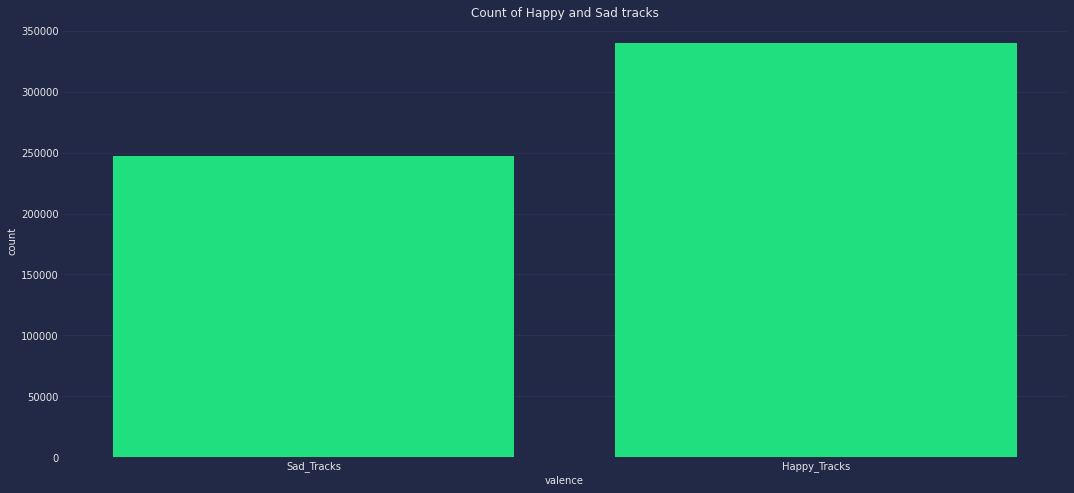

In [46]:
tracks_valence=tracks.copy() 
tracks_valence["valence"]= [ "Happy_Tracks" if i>=0.5 else "Sad_Tracks" for i in tracks.valence ]
print(tracks_valence["valence"].value_counts())
sns.countplot(tracks_valence["valence"],color='springgreen')
plt.title("Count of Happy and Sad tracks")
mplcyberpunk.add_glow_effects()
plt.show()

In [47]:
tracks['popularity'].unique()

array([  6,   0,   1,   4,  41,  38,  30,  28,  27,  26,  25,  23,  22,
        20,  18,  17,  16,  15,  14,  11,  10,   8,   9,   5,   7,   2,
        39,  33,  32,  24,  21,  19,  13,  12,   3,  51,  48,  40,  34,
        29,  47,  43,  37,  35,  31,  55,  50,  36,  42,  65,  53,  45,
        49,  46,  44,  52,  56,  54,  61,  62,  57,  69,  58,  68,  60,
        64,  63,  67,  66,  59,  74,  71,  77,  70,  79,  75,  73,  72,
        80,  78,  76,  82,  83,  84,  81,  86,  85,  87,  90,  88,  89,
        94,  92,  97,  96,  95,  93,  91, 100,  99,  98], dtype=int64)

Popularity ranges between 0 to 100.

In [48]:
# Selecting rows based on condition 
def popularity_binary(track_popularity):
     if track_popularity >= 65:
        return 1
     elif track_popularity <65:
        return 0
    
tracks['popularity'] = tracks['popularity'].apply(popularity_binary)
tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
0,35iwgR4jXetI318WEWsa1Q,Carve,0,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,2
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,6
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,3


In [49]:
print(tracks['popularity'].value_counts()) 

0    571673
1     14992
Name: popularity, dtype: int64


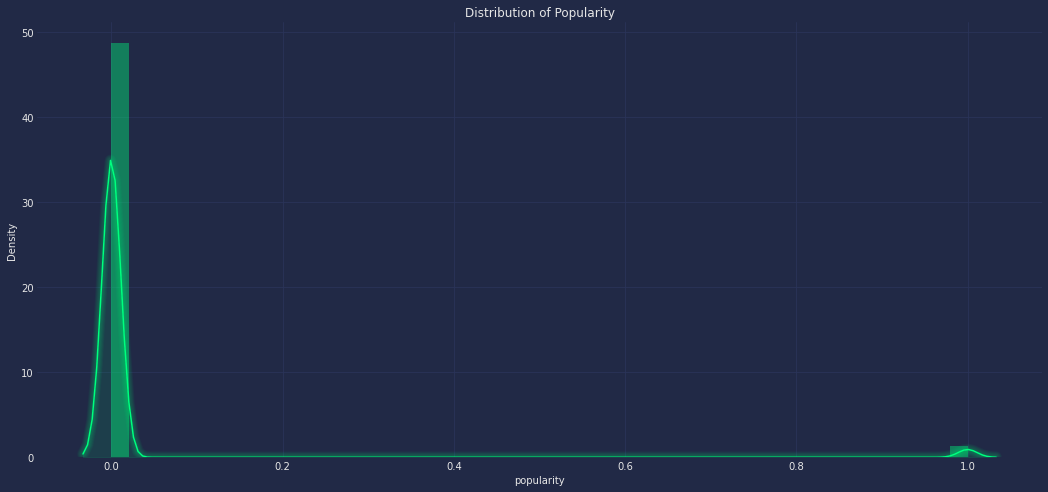

In [50]:
#check the distribution of popularity again
sns.distplot(tracks['popularity'],color='springgreen')
plt.title("Distribution of Popularity")
mplcyberpunk.add_glow_effects()
plt.show()

In [51]:
tracks_df = tracks.drop(columns=['id','name','artists','id_artists','release_date','month'],axis=1)

In [52]:
tracks_df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'year'],
      dtype='object')

In [53]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
count,586665.000000,5.866650e+05,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000,586665.000000
mean,0.025555,2.300011e+05,0.044086,0.563594,0.542036,5.221593,-10.206071,0.658795,0.104863,0.449865,0.113449,0.213935,0.552294,118.464926,3.873391,1988.566122
std,0.157802,1.255527e+05,0.205287,0.166102,0.251922,3.519416,5.089321,0.474114,0.179892,0.348836,0.266867,0.184326,0.257670,29.763849,0.473135,22.831005
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.000000
25%,0.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000,1974.000000
50%,0.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000,1992.000000
75%,0.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000,2007.000000
max,1.000000,4.797258e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,2021.000000


In [54]:
#!pip install youtube-search-python 
import random
from youtubesearchpython import VideosSearch
from IPython.display import YouTubeVideo

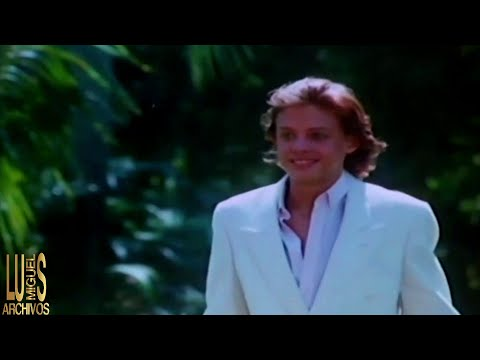

In [55]:
tracks_display=tracks.copy()
random_track = tracks_display['name'].loc[random.randint(0, len(tracks_display))]
videosSearch = VideosSearch(random_track, limit=1)
track_yt_id = videosSearch.result()['result'][0]['id']
YouTubeVideo(track_yt_id, width=1000, height=500)

In [56]:
# Create the preprocessed dataset
tracks_df.to_csv('preprocessed_tracks.csv', index=False)